In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score , mean_squared_error
from math import sqrt
import seaborn as sns

In [3]:
data = pd.read_csv("SL_Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

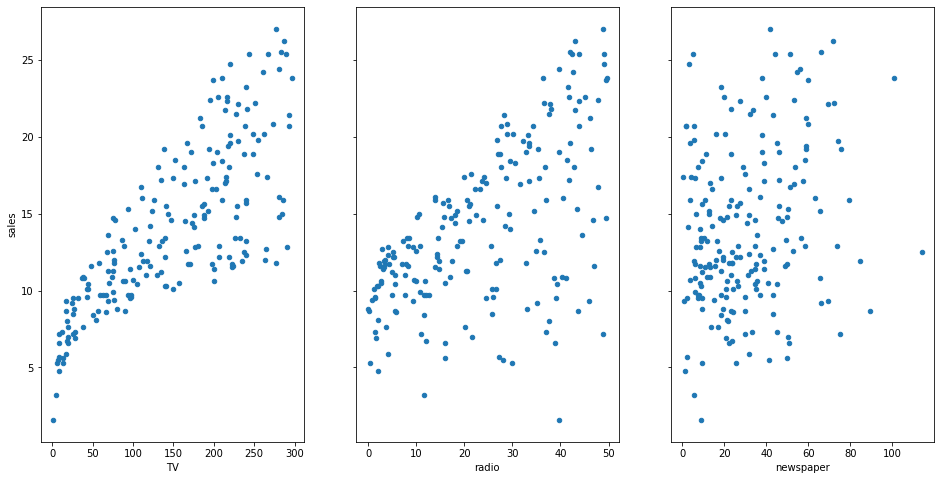

In [6]:
fig , axs = plt.subplots(1,3,sharey = True)
data.plot(kind= "scatter" ,x = "TV" , y = "sales" , ax = axs[0] , figsize = (16,8))
data.plot(kind= "scatter" ,x = "radio" , y = "sales" , ax = axs[1] , figsize = (16,8))
data.plot(kind= "scatter" ,x = "newspaper" , y = "sales" , ax = axs[2] , figsize = (16,8))

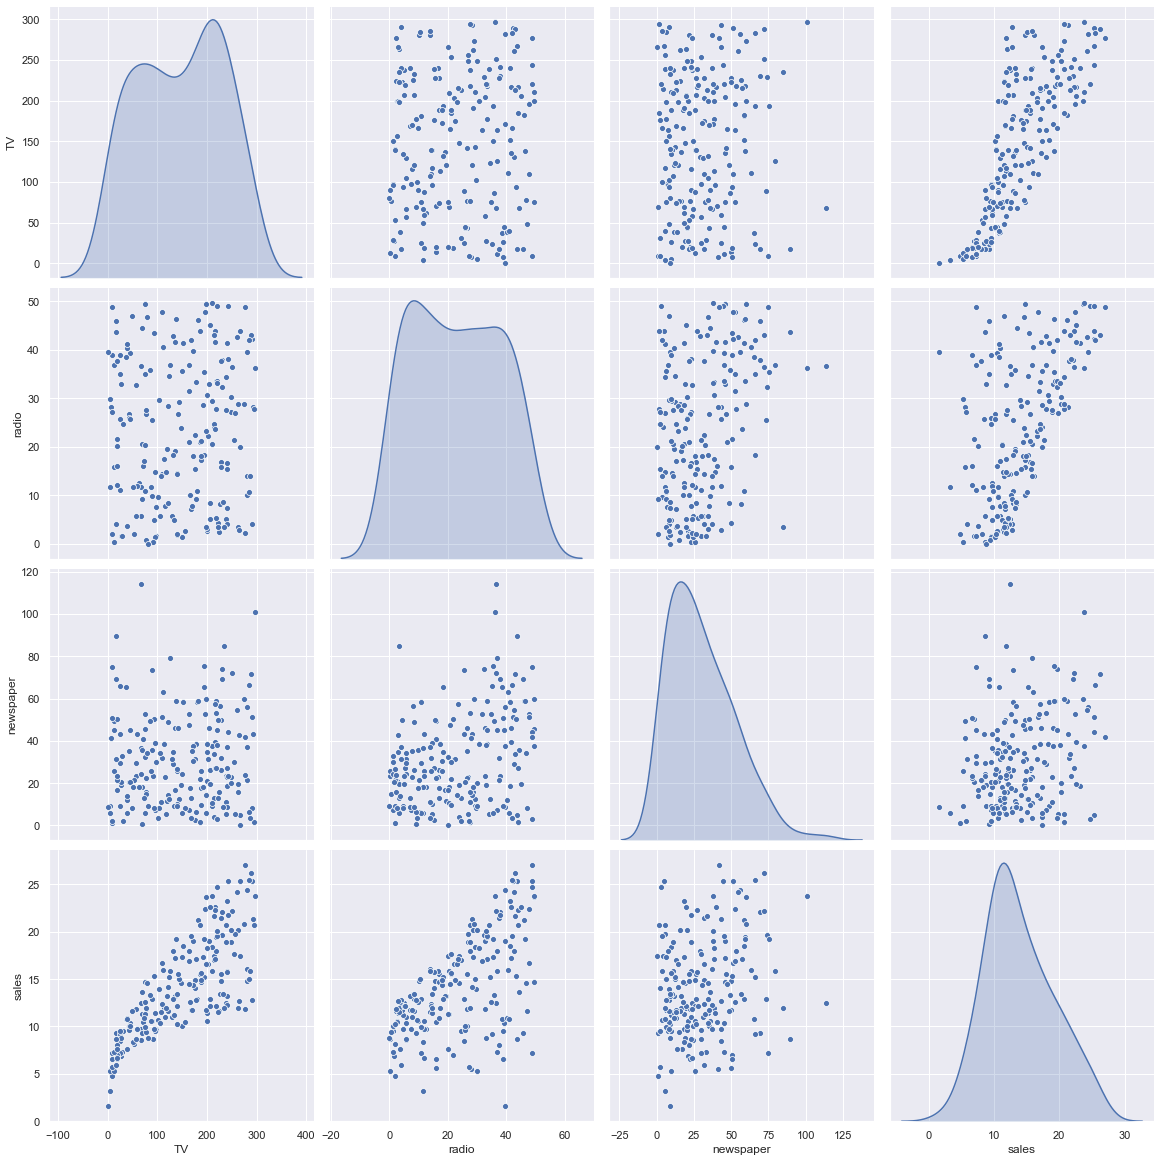

In [7]:
sns.set()
col = ["TV" , "radio" , "newspaper" , "sales"  ]
sns.pairplot(data[col], height = 4 , kind ='scatter' , diag_kind='kde')

In [8]:
features_cols = ["TV"]
x = data[features_cols]
y = data["sales"]

In [14]:
print(type(x))
print(x.shape)
#print(x)
print(type(y))
print(y[0])
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)
<class 'pandas.core.series.Series'>
22.1
(200,)


In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [22]:
def df_LR(x,y):
    lm = LinearRegression()
    lm.fit(x,y)
    print(lm.intercept_)
    print(lm.coef_)
    print(lm.score(x,y))
    return lm
    

In [23]:
df_LR(x,y)

7.032593549127693
[0.04753664]
0.611875050850071


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV+newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 04 May 2020   Prob (F-statistic):           3.95e-45
Time:                        17:10:52   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
lm.mse_total

27.22185301507538

In [71]:
type(lm.conf_int())

pandas.core.frame.DataFrame

In [73]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [76]:
lm.params.index[0]

'Intercept'

In [77]:
lm.params[0]

7.032593549127696

In [113]:
a= lm.pvalues.values
a

array([1.40630048e-35, 1.46738970e-42])

In [120]:
a.round(50)

array([1.40630048e-35, 1.46738970e-42])

In [123]:
cnames = ["features","Intercept","Coeff","R2","R2adj","Pval","mse_total","eq"]
LR_df = pd.DataFrame(columns=cnames)

In [63]:
LR_df

,features,Intercept,Coeff,R2,R2adj,Pval,eq
0,NaN,NaN,NaN,1,NaN,2,NaN
1,NaN,NaN,NaN,NaN,NaN,2,NaN


In [128]:
def stats_LR(formula,data,df,count_f):
    lm = smf.ols(formula=formula, data=data).fit()
    row_index = len(LR_df.index)
    print(lm.conf_int())
    print(lm.pvalues)
    df.loc[row_index,"features"] = formula
    df.loc[row_index,"Intercept"] = lm.params[0]
    df.loc[row_index,"Coeff"] = lm.params.values.round(4)
    df.loc[row_index,"R2"] = round(lm.rsquared,2)
    df.loc[row_index,"R2adj"] = round(lm.rsquared_adj,2)
    df.loc[row_index,"Pval"] = lm.pvalues.values.round(4)
    df.loc[row_index,"mse_total"] = round(lm.mse_total,2)
    return df

In [129]:
stats_LR('sales ~ TV',data,LR_df,2)

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


,features,Intercept,Coeff,R2,R2adj,Pval,mse_total,eq
0,sales ~ TV,7.03259,"[7.0326, 0.0475]",0.61,0.61,"[1.4063004765085496e-35, 1.4673897001946964e-42]",27.22,NaN
1,sales ~ TV+newspaper,5.77495,"[5.7749, 0.0469, 0.0442]",0.65,0.64,"[3.14585967663669e-22, 5.507583621504293e-44, ...",27.22,NaN
2,sales ~ TV,7.03259,"[7.0326, 0.0475]",0.61,0.61,"[0.0, 0.0]",27.22,NaN


In [130]:
stats_LR('sales ~ TV+newspaper',data,LR_df,2)

                  0         1
Intercept  4.738940  6.810956
TV         0.041812  0.051991
newspaper  0.024155  0.064284
Intercept    3.145860e-22
TV           5.507584e-44
newspaper    2.217084e-05
dtype: float64


,features,Intercept,Coeff,R2,R2adj,Pval,mse_total,eq
0,sales ~ TV,7.03259,"[7.0326, 0.0475]",0.61,0.61,"[1.4063004765085496e-35, 1.4673897001946964e-42]",27.22,NaN
1,sales ~ TV+newspaper,5.77495,"[5.7749, 0.0469, 0.0442]",0.65,0.64,"[3.14585967663669e-22, 5.507583621504293e-44, ...",27.22,NaN
2,sales ~ TV,7.03259,"[7.0326, 0.0475]",0.61,0.61,"[0.0, 0.0]",27.22,NaN
3,sales ~ TV+newspaper,5.77495,"[5.7749, 0.0469, 0.0442]",0.65,0.64,"[0.0, 0.0, 0.0]",27.22,NaN
